In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import warnings
warnings.filterwarnings("ignore")

In [4]:
%%capture
%run "C:\Users\Lenovo\Desktop\Heart_Disease_Project_SPRINTSXMICROSOFT\notebooks\03_feature_selection.ipynb"

Optimal number of clusters according to kneed: 3


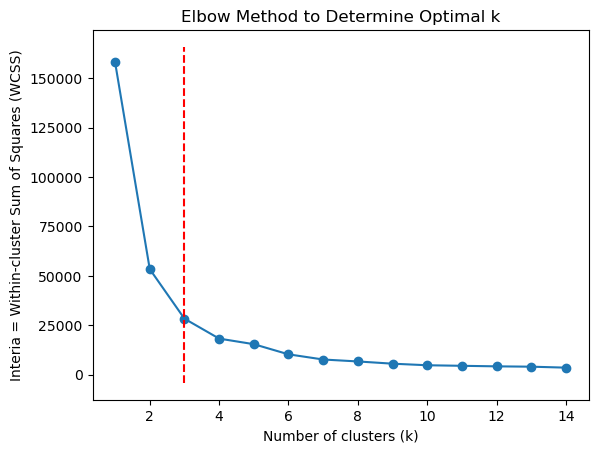

Cluster centers:
 [[4.05343511e+00 2.85496183e+00 4.35114504e-01 6.25954198e-01
  1.32824427e+00 5.90839695e-01 1.37404580e-01 1.69648855e+02
  1.29770992e-01]
 [5.29357798e+00 3.28440367e+00 7.98165138e-01 6.97247706e-01
  1.75229358e+00 1.32752294e+00 1.83486239e-01 1.44330275e+02
  4.22018349e-01]
 [5.21052632e+00 3.61403509e+00 1.00000000e+00 7.54385965e-01
  1.94736842e+00 1.60350877e+00 8.77192982e-02 1.13596491e+02
  5.96491228e-01]]


In [5]:
# 1. Apply K-Means Clustering (elbow method to determine K)

inertia = []
for i in range(1,15):
    
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)



# Use KneeLocator to find the elbow point 
kneedle = KneeLocator(range(1, 15), inertia, curve='convex', direction='decreasing')
elbow_point = kneedle.knee
print(f"Optimal number of clusters according to kneed: {elbow_point}")

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Interia = Within-cluster Sum of Squares (WCSS)')
plt.vlines(elbow_point, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

kmeans = KMeans(n_clusters=elbow_point)
kmeans.fit(X_reduced)

# Coordinates of cluster centers
centers = kmeans.cluster_centers_
print("Cluster centers:\n", centers)

Number of clusters: 20


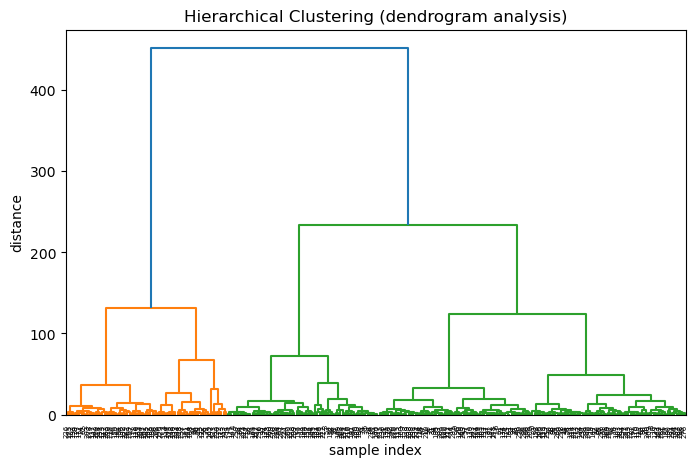

In [6]:
# 2. Perform Hierarchical Clustering (dendrogram analysis)

linked=linkage(X_reduced,method='ward') #calculates how clusters are merged
labels = fcluster(linked, t=15, criterion='distance')
num_clusters = len(np.unique(labels))
print(f"Number of clusters: {num_clusters}")

plt.figure(figsize=(8,5))
dendrogram(linked)
plt.title('Hierarchical Clustering (dendrogram analysis)')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

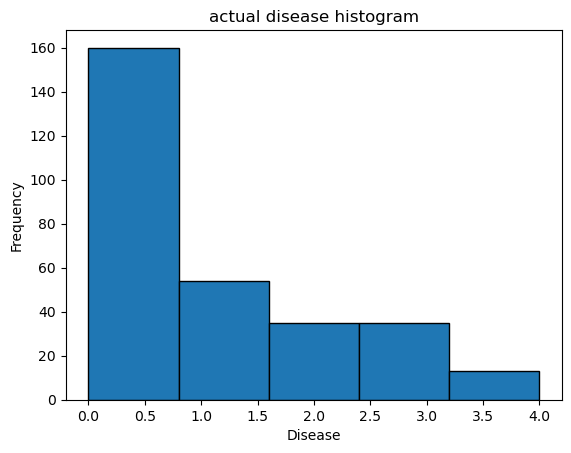

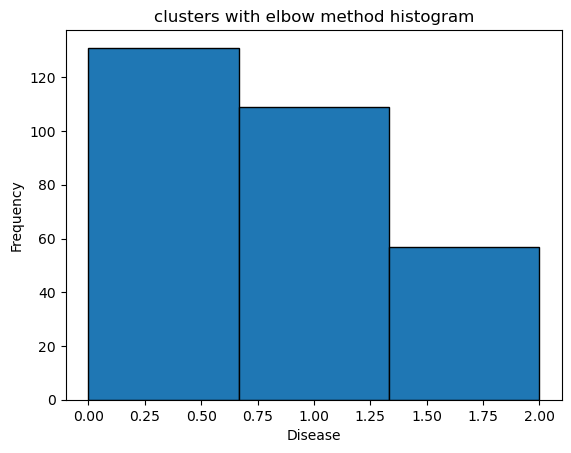

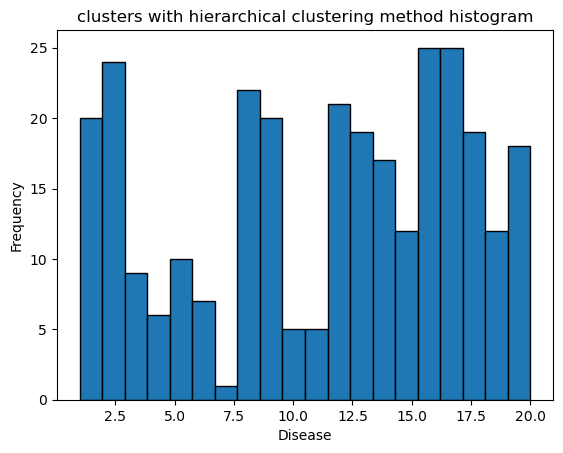

In [7]:
#3. Compare clusters with actual disease labels.(histograms)


true_labels = y_cleaned["num"]

plt.hist(true_labels,bins=5, edgecolor='black')
plt.title('actual disease histogram')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.show()

plt.hist(kmeans.labels_,bins=elbow_point, edgecolor='black')
plt.title('clusters with elbow method histogram')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.show()

plt.hist(labels,bins=num_clusters, edgecolor='black')
plt.title('clusters with hierarchical clustering method histogram')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.show()

In [8]:
np.unique(true_labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [16]:
#Compare clusters with actual disease labels.


# Automatically detect label IDs
true_label_ids = np.unique(true_labels)

print("hierarchical clustering method:")
pred_label_ids = np.unique(labels)
# Create a confusion matrix-like count and display mapping
for cluster_id in pred_label_ids:
    counts = []
    for true_id in true_label_ids:
        count = np.sum((labels == cluster_id) & (true_labels == true_id))
        counts.append(count)
    print(f"Cluster {cluster_id}: {counts}")
    print(f"→ Cluster {cluster_id} corresponds mostly to true label {true_label_ids[np.argmax(counts)]+1}\n")

print("elbow method:")    
pred_label_ids = np.unique(kmeans.labels_)
# Create a confusion matrix-like count and display mapping
for cluster_id in pred_label_ids:
    counts = []
    for true_id in true_label_ids:
        count = np.sum((kmeans.labels_ == cluster_id) & (true_labels == true_id))
        counts.append(count)
    print(f"Cluster {cluster_id}: {counts}")
    print(f"→ Cluster {cluster_id} corresponds mostly to true label {true_label_ids[np.argmax(counts)]}\n")

hierarchical clustering method:
Cluster 1: [5, 5, 3, 5, 2]
→ Cluster 1 corresponds mostly to true label 1

Cluster 2: [8, 3, 4, 5, 4]
→ Cluster 2 corresponds mostly to true label 1

Cluster 3: [1, 3, 3, 2, 0]
→ Cluster 3 corresponds mostly to true label 2

Cluster 4: [3, 1, 1, 1, 0]
→ Cluster 4 corresponds mostly to true label 1

Cluster 5: [1, 2, 1, 5, 1]
→ Cluster 5 corresponds mostly to true label 4

Cluster 6: [1, 2, 1, 3, 0]
→ Cluster 6 corresponds mostly to true label 4

Cluster 7: [0, 0, 1, 0, 0]
→ Cluster 7 corresponds mostly to true label 3

Cluster 8: [20, 2, 0, 0, 0]
→ Cluster 8 corresponds mostly to true label 1

Cluster 9: [12, 5, 1, 2, 0]
→ Cluster 9 corresponds mostly to true label 1

Cluster 10: [4, 1, 0, 0, 0]
→ Cluster 10 corresponds mostly to true label 1

Cluster 11: [5, 0, 0, 0, 0]
→ Cluster 11 corresponds mostly to true label 1

Cluster 12: [18, 2, 0, 0, 1]
→ Cluster 12 corresponds mostly to true label 1

Cluster 13: [16, 2, 0, 0, 1]
→ Cluster 13 corresponds mostl

In [18]:
# comparing them point by point
compare_result = [0,0,0,0,0]

compare_result[0] = sum((true_labels == 0) & (kmeans.labels_ == 0))
compare_result[1] = sum((true_labels == 1) & (kmeans.labels_ == 2))
compare_result[2] = sum((true_labels == 2) & (kmeans.labels_ == 1))

print("Elbow Method: ")
print(f"Number of points correctly classified for each class:")
print(f"Class 0: {compare_result[0]}")
print(f"Class 1: {compare_result[1]}")
print(f"Class 2: {compare_result[2]}")
print(f"Class 3: {compare_result[3]}")
print(f"Class 4: {compare_result[4]}")
print(f"Number of points miss-classified: {len(true_labels)-sum(compare_result)} points\n\n")


compare_result[0] = sum((true_labels == 0) & (labels == 1))
compare_result[1] = sum((true_labels == 1) & (labels == 2))
compare_result[2] = sum((true_labels == 3) & (labels == 3))

print("Hierarchical Clustering Method: ")
print(f"Number of points correctly classified for each class:")
print(f"Class 0: {compare_result[0]}")
print(f"Class 1: {compare_result[1]}")
print(f"Class 2: {compare_result[2]}")
print(f"Class 3: {compare_result[3]}")
print(f"Class 4: {compare_result[4]}")
print(f"Number of points miss-classified: {len(true_labels)-sum(compare_result)} points")

Elbow Method: 
Number of points correctly classified for each class:
Class 0: 97
Class 1: 11
Class 2: 20
Class 3: 0
Class 4: 0
Number of points miss-classified: 169 points


Hierarchical Clustering Method: 
Number of points correctly classified for each class:
Class 0: 5
Class 1: 3
Class 2: 2
Class 3: 0
Class 4: 0
Number of points miss-classified: 287 points
